In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from sklearn.svm import SVC
from sklearn.metrics import f1_score

# Kernel Lineal

In [2]:
file_name = 'ex6data1.mat'

def read_file(file_name):
    data = sio.loadmat(file_name)
    # training set
    X, y = data['X'], data['y']
    return X, y

In [3]:
X,y = read_file(file_name)

In [4]:
#svm = SVC(C=1.0, kernel='rbf', tol=0.001, max_iter=1)

In [5]:
svm_1 = SVC(kernel='linear', C=1.0)
svm_100 = SVC(kernel='linear', C=100.0)
svm_1.fit(X, y)
svm_100.fit(X, y)

C:\Users\willw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\willw\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

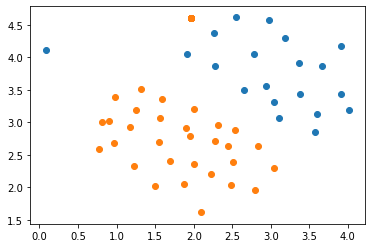

In [6]:
pos = np.where(y == 1)
plt.scatter(X[pos,0], X[pos,1])
pos = np.where(y == 0)
plt.scatter(X[pos,0], X[pos,1])

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svm_1.decision_function(xy).reshape(XX.shape)

Z_100 = svm_100.decision_function(xy).reshape(XX.shape)

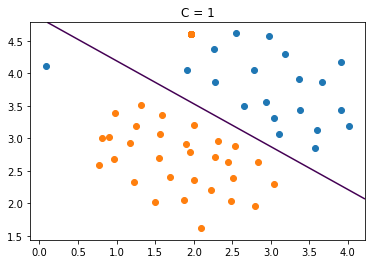

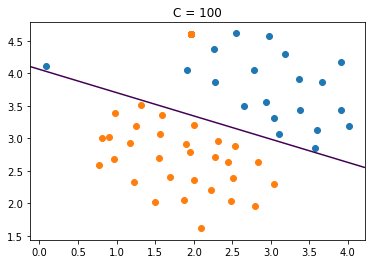

In [7]:
plt.title("C = 1")
pos = np.where(y == 1)
plt.scatter(X[pos,0], X[pos,1])
pos = np.where(y == 0)
plt.scatter(X[pos,0], X[pos,1])
plt.contour(XX,YY,Z, levels=[0])
plt.show()
plt.title("C = 100")
pos = np.where(y == 1)
plt.scatter(X[pos,0], X[pos,1])
pos = np.where(y == 0)
plt.scatter(X[pos,0], X[pos,1])
plt.contour(XX,YY,Z_100, levels=[0])
plt.show()

# Kernel Gaussiano

In [8]:
file_name = 'ex6data2.mat'

X, y = read_file(file_name)

In [9]:
C = 1.0
sigma = 0.1
gamma = 1 / (2 * sigma**2)

#svm = SVC(kernel='rbf', C=C, gamma=1 / (2 * sigma**2))
svm = SVC(kernel='rbf', C=C, gamma= gamma)
svm.fit(X,y.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

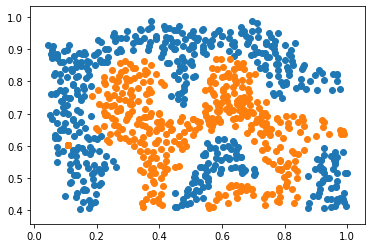

In [10]:
pos = np.where(y == 1)
plt.scatter(X[pos,0], X[pos,1])
pos = np.where(y == 0)
plt.scatter(X[pos,0], X[pos,1])

#limites del grid de puntos
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svm.decision_function(xy).reshape(XX.shape)

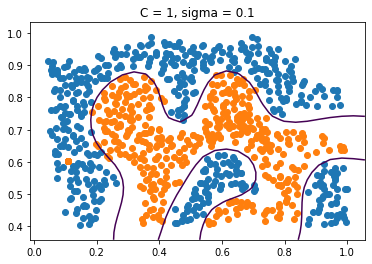

In [11]:
plt.title("C = 1, sigma = 0.1")
pos = np.where(y == 1)
plt.scatter(X[pos,0], X[pos,1])
pos = np.where(y == 0)
plt.scatter(X[pos,0], X[pos,1])
plt.contour(XX,YY,Z, levels=[0])
plt.show()

## Eleccion de parametros

In [12]:
from sklearn.metrics import confusion_matrix as cm

In [13]:
file_name = "ex6data3.mat"
data = sio.loadmat(file_name)
# training set
X, y = data['X'], data['y']
Xval, yval = data['Xval'], data['yval']
C_s = [ 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_s = [ 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]

In [14]:
def precision(tp, fp):
    return tp / (tp + fp)

In [15]:
C_values = []
sigma_values = []
p_values = []

for C in C_s:
    for sigma in sigma_s:
        svm = SVC(kernel='rbf', C=C, gamma=1 / (2 * pow(sigma,2)))
        svm.fit(X,y.ravel())
        y_pred = svm.predict(Xval)
        tp,fn ,fp ,tn = cm(y_pred,yval).ravel()
        p = precision(tp,fp)
        C_values.append(C)
        sigma_values.append(sigma)
        p_values.append(p)
        if(p > 0.95):
            print("C=",C,"sigma=", sigma)
            print("precision =",precision(tp,fp), "\n")

C= 0.1 sigma= 0.1
precision = 0.9646017699115044 

C= 0.3 sigma= 0.1
precision = 0.9557522123893806 

C= 1 sigma= 0.03
precision = 0.9557522123893806 

C= 1 sigma= 0.1
precision = 0.9646017699115044 

C= 1 sigma= 0.3
precision = 0.9646017699115044 

C= 3 sigma= 0.1
precision = 0.9734513274336283 

C= 10 sigma= 0.1
precision = 0.9557522123893806 

C= 10 sigma= 0.3
precision = 0.9646017699115044 

C= 10 sigma= 1
precision = 0.9646017699115044 

C= 30 sigma= 0.3
precision = 0.9646017699115044 

C= 30 sigma= 1
precision = 0.9646017699115044 



In [16]:
higher_val = np.where(p_values == np.max(p_values))[0][0]
print(p_values[higher_val])
print(C_values[higher_val])
print(sigma_values[higher_val])

svm = SVC(kernel='rbf', C=C_values[higher_val], gamma=1 / (2 * sigma_values[higher_val]**2))
svm.fit(X,y.ravel())

0.9734513274336283
3
0.1


SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

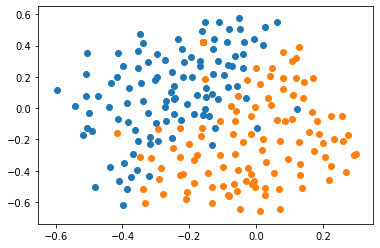

In [17]:
pos = np.where(y == 1)
plt.scatter(X[pos,0], X[pos,1])
pos = np.where(y == 0)
plt.scatter(X[pos,0], X[pos,1])

#limites del grid de puntos
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = svm.decision_function(xy).reshape(XX.shape)

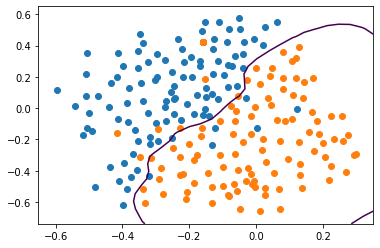

In [18]:
pos = np.where(y == 1)
plt.scatter(X[pos,0], X[pos,1])
pos = np.where(y == 0)
plt.scatter(X[pos,0], X[pos,1])
plt.contour(XX,YY,Z, levels=[0])
plt.show()

# Deteccion de spam en emails

In [19]:
import codecs
import os, os.path

%run process_email.py
%run get_vocab_dict.py

vocab_dict = getVocabDict()

spam_dir = "./spam"
easy_ham_dir = "./easy_ham"
hard_ham_dir = "./hard_ham"

def get_num_email(folder):
    return len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))])

num_spam = get_num_email(spam_dir)
num_easy = get_num_email(easy_ham_dir)
num_hard = get_num_email(hard_ham_dir)

Hacemos el vector de palabras con cada email del dataset que tenemos y nos queda un vector X(3301,1899) 
3301 emails con 1899 features cada uno, siendo cada feature una palabra del diccionario

In [20]:
directorio = spam_dir[2:]

X = np.zeros([len(vocab_dict),num_spam+num_easy+num_hard])

for i in range(num_spam): 
    email_contents = codecs.open('{0}/{1:04d}.txt'.format(directorio, i+1), 'r',encoding='utf-8', errors='ignore').read()
    email = email2TokenList(email_contents)
    for word in email:
        if word in vocab_dict:
            X[vocab_dict[word]-1,i] = 1

directorio = easy_ham_dir[2:]
for i in range(num_easy): 
    email_contents = codecs.open('{0}/{1:04d}.txt'.format(directorio, i+1), 'r',encoding='utf-8', errors='ignore').read()
    email = email2TokenList(email_contents)
    for word in email:
        if word in vocab_dict:
            X[vocab_dict[word]-1,i+num_spam] = 1

directorio = hard_ham_dir[2:]
for i in range(num_hard): 
    email_contents = codecs.open('{0}/{1:04d}.txt'.format(directorio, i+1), 'r',encoding='utf-8', errors='ignore').read()
    email = email2TokenList(email_contents)
    for word in email:
        if word in vocab_dict:
            X[vocab_dict[word]-1,i+num_spam+num_easy] = 1

El vector de predicciones de y es 1 si es spam y 0 si no lo es

In [21]:
y = np.zeros(num_spam+num_easy+num_hard)
y[:num_spam] = 1

Necesitamos hacer diferentes conjuntos de los datos para entrenamiento, validacion cruzada y test
Por lo tanto permutamos los indices para obtener una muestra aleatoria

In [22]:
p = np.random.permutation(len(y))

y = y[p]
X = X.T[p]

Asignamos un 60% a test, 30% a validacion cruzada y 10% a test

In [23]:
train = round(len(y)*0.6) 
cross = round(len(y)*0.3) + train
test  = round(len(y)*0.1) + cross

Xval = X[train:cross]
yval = y[train:cross]
Xtest = X[cross:]
ytest = y[cross:]

Con los datos de CV comprobamos cuales parametros optimizan mejor la solucion de detectar el spam en un email

In [24]:
C_values = []
sigma_values = []
p_values = []
f1_values = []

for C in C_s:
    for sigma in sigma_s:
        svm = SVC(kernel='rbf', C=C, gamma=1 / (2 * pow(sigma,2)))
        svm.fit(X[:train],y[:train].ravel())
        y_pred = svm.predict(Xval)
        tp,fn ,fp ,tn = cm(yval,y_pred).ravel()
        p = precision(tp,fp)
        f1 = f1_score(yval,y_pred)
        f1_values.append(f1)
        C_values.append(C)
        sigma_values.append(sigma)
        p_values.append(p)
        if(f1 > 0.9):
            print("C=",C,"sigma=", sigma)
            print("f1 =",f1)
            print("precision =",precision(tp,fp), "\n")

C:\Users\willw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\willw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\willw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\willw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\willw\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: Undefined

C= 10 sigma= 10
f1 = 0.906906906906907
precision = 0.9688249400479616 

C= 30 sigma= 10
f1 = 0.9226190476190477
precision = 0.97352587244284 

C= 30 sigma= 30
f1 = 0.9036144578313253
precision = 0.9676646706586827 



In [25]:
higher_val = np.where(f1_values == np.max(f1_values))[0][0]
print("Highest f1 :", f1_values[higher_val])
print("Highest precision :", p_values[higher_val])
print("C =", C_values[higher_val])
print("sigma =", sigma_values[higher_val])

Highest f1 : 0.9226190476190477
Highest precision : 0.97352587244284
C = 30
sigma = 10


Una vez obtenidos los parametros que mejor optimizan el problema, lo volvemos a entrenar con estos pero ahora realizando las predicciones con el conjunto de test

In [26]:
svm = SVC(kernel='rbf', C=C_values[higher_val], gamma=1 / (2 * sigma_values[higher_val]**2))
svm.fit(X[:train],y[:train].ravel())
y_pred = svm.predict(Xtest)
tp,fn ,fp ,tn = cm(ytest,y_pred).ravel()
p = precision(tp,fp)
f1 = f1_score(ytest,y_pred)

In [27]:
print("Precision:", p,"\nF1 score:", f1)

Precision: 0.9895470383275261 
F1 score: 0.9302325581395349
